**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Music genre classification with Linear Discriminant Analysis* 

## Abstract

*In this report we will discuss what Machine Learning (ML) methods are suitable for multilabel classification when the dataset consists of a large amount of features and is unbalanced between classes. This large amount of features makes the classification problem complicated. Thus, we compare what different feature learning methods can be used to tackle these challenges. We identify Linear Discriminant Analysis (LDA) to be an efficient method for feature selection in a labeled multilabel datasets with a large amount of features. We also introduce Cross Validation methods to test Machine Learning models. With these methods we can identify the best ML models for the problem and optimize these methods. After testing the methods against each other, we find Random Forest Classification combined with LDA components to be the most accurate model. As many of the models have similar performance, we establish that we can use a combination of the best models to achieve an even better accuracy. Then we look closer into the performance of the best solution(s) and reflect on related literature. Finally, we discuss suggestions for future improvements.*



## 1. Introduction

*This study attempts to address the question of what is the most efficient machine learning (ML) method in classifying unknown songs to music genres. We aim to construct a classifier which is able to label the data as accurately as possible. The label space consists of ten different music genres: Pop_Rock, Electronic, Rap, Jazz, Latin, RnB, International, Country, Reggae, Blues. For a human the task of deciding to which category a song belongs to is easy. However, it is really time consuming and if one needs to label a digital library of thousands of songs it might seem a really burdensome task. With ML methods we can cut the time needed into a couple of minutes or even seconds. ML methods help us do simple tasks much faster and more efficiently. We hope that the project shows us how a ML method can be applied to a real-life application, how to construct a working classifier and improve it in order to achieve an even better accuracy. First we will introduce and analyze the data. Then dive into the methods and experiments we used to find the most suitable classifiers. Finally we present our optimal classifier and interpret its results.*



## 2. Data analysis

The dataset consists of training dataset with 4363 songs, and a test set of 6544 songs. Each song has 264 features, and there are 10 possible classes in total. The majority of the songs in the training set belong to the first category ‘Pop_Rock’ (2177 observations). In the smallest category ‘Blues’ we only have 86 observations. The small number of songs in some categories sets some challenges to our ML methods. This constraint can negatively affect the training of our classification models. We would prefer to have more labeled songs in the training set in these less-represented genres. As we can later see from our results, less represented classes are harder to classify with our model. A more detailed class distribution is depicted in the histogram.

The vast amount of features (264 per data point), imbalance of classes and multicollinearity of features makes the classifying the dataset challenging. Although feature selection methods give us some aid in these problems. We test different approaches to tackle these issues.




In [1]:
# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore")

#%matplotlib inline


def load_data():
    # Load data
    data = pd.read_csv("train_data.csv", header=None)
    labels = pd.read_csv("train_labels.csv", header=None)
    test = pd.read_csv("test_data.csv", header=None)

    return data, labels


def visualize_data(data, labels):
    # Scale data since PCA (and lda) affected by scale
    scaled_data = StandardScaler().fit_transform(data)
    colors = ['red', 'green', 'blue', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'white', 'gray']

    # pricipal components 2
    components = PCA(n_components=2).fit_transform(scaled_data)
    principal_df = pd.DataFrame(data=components, columns=['PC_1', 'PC_2'])
    # 3 principal components
    components = PCA(n_components=3).fit_transform(scaled_data)
    principal_df = pd.DataFrame(data=components, columns=['PC_1', 'PC_2', 'PC_3'])

    # 2 LDA components
    lda = LDA(n_components=2)
    lda_data = lda.fit_transform(scaled_data, labels.values.ravel())
    lda_df = pd.DataFrame(data=lda_data, columns=['LD_1', 'LD_2'])
    # 3 LDA components
    lda = LDA(n_components=3)
    lda_data = lda.fit_transform(scaled_data, labels.values.ravel())
    lda_df = pd.DataFrame(data=lda_data, columns=['LD_1', 'LD_2', 'LD_3'])

    ###PLOT###
    # plot 2d graphs
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].scatter(principal_df['PC_1'], principal_df['PC_2'], c=labels[0], cmap=mpl.colors.ListedColormap(colors))
    axes[0].set_title('2 PC')

    axes[1].scatter(lda_df['LD_1'], lda_df['LD_2'], c=labels[0], cmap=mpl.colors.ListedColormap(colors))
    axes[1].set_title('2 LDA')
    plt.show()

    # plot 3d graphs
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter3D(principal_df['PC_1'], principal_df['PC_2'], principal_df['PC_3'], c=labels[0],
                 cmap=mpl.colors.ListedColormap(colors))
    ax.set_title('3 PC')

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(lda_df['LD_1'], lda_df['LD_2'], lda_df['LD_3'], c=labels[0], cmap=mpl.colors.ListedColormap(colors))
    ax.set_title('3 LDA')

    plt.show()

def create_histogram(labels):
    ##create histogram
    fig = plt.figure()
    plt.hist(labels[0], bins=10)
    plt.title('Label distribution')
    plt.ylabel('Number of observations')
    plt.xlabel('Label')
    plt.axis([1, 10, 0, 2500])
    plt.show()




Training Data dimensions:
(4363, 264)
Training Labels dimensions:
(4363, 1)


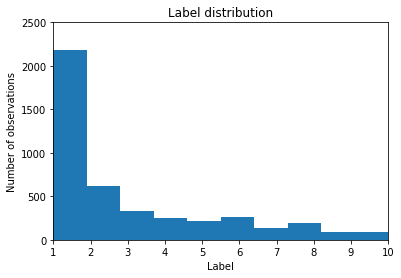

In [2]:
# Load the data and cleanup
data, labels = load_data()
print("Training Data dimensions:")
print(data.shape)

print("Training Labels dimensions:")
print(labels.shape)

create_histogram(labels)


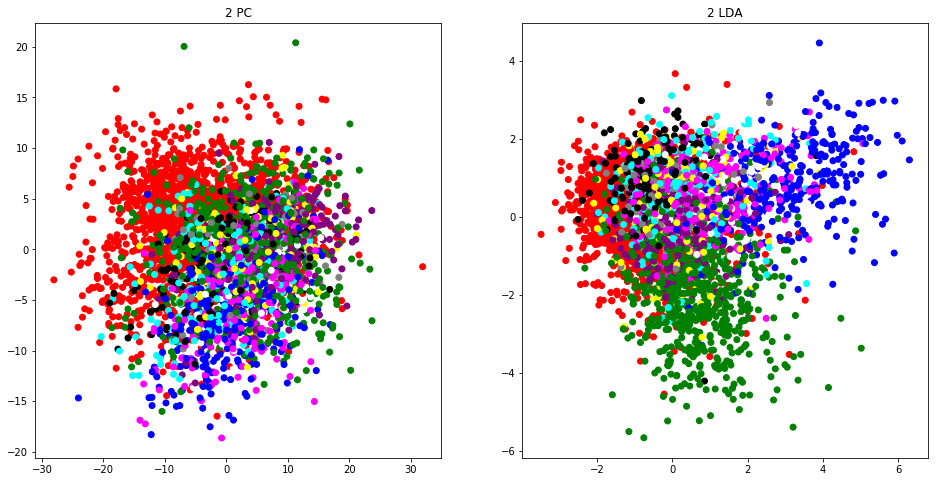

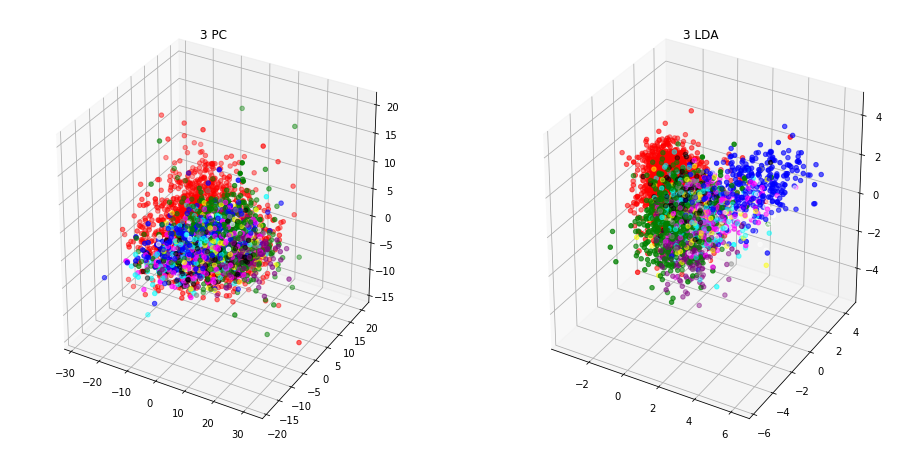

In [3]:
#Analysis of the input data
# ...

visualize_data(data, labels)

## 3. Methods and experiments

### Simple Logistic regression is not sufficient
Even though Logistic regression is a simple and powerful linear classification algorithm, it has some limitations which set it aside when we need a multiclass classifier. Logistic regression works fine when we use it for two-class classification, but it is rarely used for multiclass classification purpose. Logistic regression can become unstable when the classes are well separated or when there are few observations to estimate the parameters. (Brownlee, 2016). Linear discriminant analysis (LDA) is often used when multi-class classification problems are faced.
 
As we can see from the graph, the principal component analysis (PCA) is not able visualize the data very well. Linear discriminant analysis (LDA) with 3 components manages much better.

Before running any ML algorithms on the training data, we scale it. Feature scaling is used to normalize the data. This is done since the range of values of raw data may vary widely and some techniques will not work properly without the normalization.

### Comparison of PCA and LDA, Why LDA outperforms
PCA and LDA are popular and very often used dimensionality reduction & feature learning techniques in Machine Learning problems. Both of these methods aim to reduce the dimensionality of a dataset consisting of many variables correlated with each other and do it with minimum information loss. This reduces overfitting by projecting the dataset onto a lower-dimensional space.
 
While the PCA is an unsupervised learning algorithm, meaning that the method ignores the labels to find the principal components that maximize the variance, LDA is a supervised learning technique and as such computes the linear discriminants that will represent the axes that maximize the separation between multiple classes. The axes are the eigenvectors that maximize the variance of the data. This kind of good class separability in dataset is, however, ignored in the PCA (Agarwal, 2015). In short, PCA finds the axes with maximum variance for the whole data set and LDA focuses on finding the axes for best class separability. This can be seen from the visualization presented earlier. LDA clearly outperforms PCA with 2 or 3 components. The LDA visualization shows clear separability between classes, and with PCA it is harder to distinguish between the classes.
 
Another notable difference between the two methods is related to the assumptions of distributions behind the data points. In PCA there is no assumption on the data points being normally distributed. However, if the data points are not normally distributed, PCA is only really approximating their features via their first two moments. This means that the solution will not be optimal unless the data points are normally distributed. In LDA the approach is slightly different. In LDA, we assume that the data points are sampled from two separate multivariate normal distributions with different means but the same covariance matrix (Agarwal, 2015).
 
Even thought that it might seem at first that LDA overpowers the PCA, that is not the case. PCA tends to outperform LDA when the number of samples per class is relatively small. However, in a situation like the music genre classification, where we have a large dataset with multiple classes, the LDA is much better since the dimensionality reduction with an effective class separability plays an important role (Agarwal, 2015).
 
### Combining LDA with different ML classification methods
In this project assignment we tested the following machine learning methods: 
Linear and Logistic regressions
k-nearest neighbors algorithm (KNN)
Naive Bayes Classifier
Random Forest Classifier
Support vector machine (SVM)
All of these classification methods were improved when we combined these with using Linear Discriminant Analysis (LDA). Naive Bayes and linear regression methods were not very successful while the others seemed to output very similar accuracy levels. LDA combined with Random Forest Classifier seemed to be the most accurate method.

We tested multiple variations of the models with and without feature selection (PCA & LDA). Once we found the most accurate models, we searched for ways to optimize these models. We searched for the best hyperparameters, in order to get the most accurate results. To find the best models and hyperparameters, we used Cross Validation (CV) techniques.

### Cross Validation and testing
In order to find the best models and optimize them we used Cross Validation, we used the GridsearchCV function from Scikit learn -library. Cross validation means that first we split the training data into k-subsets/folds. Then we train an ML model on all but one of the subsets. Lastly, we validate the model by using the subset which was not used for training. This process is then repeated k times, while using a different subset for evaluation during every iteration. This process is also run multiple times by using different hyperparameters. The goal is to find the best possible parameters to maximize model performance.


After having solved the optimal parameters for each ML model, we benchmarked the accuracy levels of the optimized models against each other. We test each model with n iterations while performing a Stratified shuffle split for each iteration.

In every iteration we shuffled the data so that we get two random subsets of the dataset (Training and validation). The split is stratified, so both subsets (Training and validation) will have the same class distribution as the original dataset. The LDA Random Forest Classifier provides the best accuracy on average.


### Multimodel Classifier
To enhance our classifying method even further, we decided to build a “multimodel classifier” using the best 4 optimized models. We construct a voting system which takes as input the labels from all our best performing ML methods, Then the voting system checks which label is most represented (mode of predictions) in each row (song) and then outputs that label. In case of draw, we decided to prioritize the result of the LDA Random Forest Classifier. According to the tests the multiple model classifier outperformed the individual models. The voting system seemed to work and we were able to increase our labeling accuracy even further.


In [4]:
# Trials with ML algorithms
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore")


##load data
train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)

# scale data
sc = StandardScaler()
scaled_train = sc.fit_transform(train_data)
scaled_validation = sc.fit_transform(test_data)


    ####cross validation and optimal parameter selection methods ###

##CV grid function
def gridCV(model, param_grid, nfolds, X, y):

    grid_search = sk.model_selection.GridSearchCV(model, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_


##Runs random forest cross validation - WARNING THIS IS SLOW
def random_forest_cv(n, x, y):
    param_grid = {
        'n_estimators': [1, 10, 100, 200],
        'max_features': ['auto'],
        'max_depth': [10, 11, 12, 13],
        'criterion': ['gini', 'entropy'],
        'min_samples_leaf': [1, 2, 3],
        'min_samples_split': [3, 4, 5, 6, 7]
    }

    print("Random forest results:")
    for i in range(9, 11, 1):
        print(i)
        lda = LDA(n_components=i)
        lda_train = lda.fit_transform(x, y.values.ravel())
        params, score = gridCV(RandomForestClassifier(), param_grid, n, lda_train, y.values.ravel())
        print("LDA components: " + str(i) + "   Parameters: " + str(params) + "  Score: " + str(np.round(score, 4)))
    print("\n")

##KNN - WARNING THIS IS SLOW
def knn_cv(n, x, y):
    ns = [8, 9, 10, 11, 12]
    leaf_sizes = [1, 2, 3, 5]
    weights = ['uniform', 'distance']
    algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
    param_grid = {'n_neighbors': ns, 'leaf_size': leaf_sizes, 'weights': weights, 'algorithm': algorithms}

    print("KNN results:")
    for i in range(9, 11, 1):
        lda = LDA(n_components=i)
        lda_train = lda.fit_transform(x, y.values.ravel())
        params, score = gridCV(sk.neighbors.KNeighborsClassifier(), param_grid, n, lda_train, y.values.ravel())
        print("LDA components: " + str(i) + "   Parameters: " + str(params) + "  Score: " + str(np.round(score, 4)))
    print("\n")

## SVM cross validation--> WARNING THIS IS VERY SLOW
def svm_cv(n, x, y):

    kernels = ['rbf', 'linear']
    Cs = [0.001, 0.01, 0.1, 1, 10, 15]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas, 'kernel': kernels}

    print("LDA SVM results:")
    for i in range(9, 11, 1):
        lda = LDA(n_components=i)
        lda_train = lda.fit_transform(x, y.values.ravel())
        params, score = gridCV(sk.svm.SVC(), param_grid, n, lda_train, y.values.ravel())
        print("LDA components: " + str(i) + "   Parameters: " + str(params) + "  Score: " + str(np.round(score, 4)))

    print("\n")

##logistic regression CV with LDA
def cv_logistic_lda(n, x, y):

    Cs = [0.001, 0.01, 0.1, 1, 10]
    max_iters = [100, 200, 300]
    param_grid = {'C': Cs, 'max_iter': max_iters}

    print("LDA Logistic regression results:")
    for i in range(8, 11, 1):
        lda = LDA(n_components=i)
        lda_train = lda.fit_transform(x, y.values.ravel())
        params, score = gridCV(sk.linear_model.LogisticRegression(solver='lbfgs', multi_class='auto'), param_grid, n, lda_train, y.values.ravel())
        print("LDA components: " + str(i) + "   Parameters: " + str(params) + "  Score: " + str(np.round(score, 4)))

    print("\n")
    
    
      
        ####tests models. Creates n results(accuracy scores) per model.####
def test_models(n):

    results = {'lda_log': [], 'lda_knn': [], 'lda_randomforest': [], 'lda_SVM': []}
    logloss_results = {'lda_log' : [], 'lda_knn' : [],'lda_randomforest' : [],'lda_SVM' : []}
    
    for i in range(n):
        # split data into training and validation
        x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(train_data, train_labels,
                                                                               stratify=train_labels, test_size=0.25)
        # scale data
        sc = StandardScaler()
        scaled_train = sc.fit_transform(x_train)
        scaled_validation = sc.fit_transform(x_test)
        #LDA
        lda = LDA(n_components=10)
        lda_train = lda.fit_transform(scaled_train, y_train.values.ravel())
        lda_test = lda.transform(scaled_validation)

        #1 logistic lda_regression
        logistic_lda_reg = sk.linear_model.LogisticRegression(solver='lbfgs', C=0.1, multi_class='auto')
        logistic_lda_reg.fit(lda_train, y_train.values.ravel())
        log_logloss_score = sk.metrics.log_loss(y_test, logistic_lda_reg.predict_proba(lda_test))
        log_score = logistic_lda_reg.score(lda_test, y_test)
        results['lda_log'].append(log_score)
        logloss_results['lda_log'].append(log_logloss_score)

        #2 lda_random forest classifier
        classifier = RandomForestClassifier(max_depth=11, criterion='gini', max_features='auto', n_estimators=200, min_samples_leaf= 2, min_samples_split = 7)
        classifier.fit(lda_train, y_train.values.ravel())
        forest_logloss_score = sk.metrics.log_loss(y_test, classifier.predict_proba(lda_test))
        forest_score = classifier.score(lda_test, y_test)
        results['lda_randomforest'].append(forest_score)
        logloss_results['lda_randomforest'].append(forest_logloss_score)

        #3 LDA KNN
        knn = sk.neighbors.KNeighborsClassifier(n_neighbors=10, algorithm='auto', leaf_size=1, weights='distance')
        knn.fit(lda_train, y_train.values.ravel())
        knn_logloss_score = sk.metrics.log_loss(y_test, knn.predict_proba(lda_test))
        knn_score = knn.score(lda_test, y_test)
        results['lda_knn'].append(knn_score)
        logloss_results['lda_knn'].append(knn_logloss_score)

        #4 LDA SupporVectorMachine
        SVM = sk.svm.SVC(kernel='linear', C=1, gamma=0.001)
        SVM.fit(lda_train, y_train.values.ravel())
        svm_score = SVM.score(lda_test, y_test)
        results['lda_SVM'].append(svm_score)

    return results, logloss_results


    ###run logistic regression cross validation - WARNING others can be very slow to run.###
# you can change 'cv' parameter n for faster runtime. Lower number --> faster runtime. minimum is 2.
cv_logistic_lda(2, scaled_train, train_labels)
#svm_cv(2, scaled_train, train_labels)
#knn_cv(2, scaled_train, train_labels)
#random_forest_cv(2, scaled_train, train_labels)


    ###tests models with "optimal" hyperparameters. This way we can compare the compare models to eachother.
#each iteration we a stratified shuffle + split into training and validation subsets

n = 5  # number of iterations
results, logloss_results = test_models(n)
#print(results) prints all results
print("Average results after " + str(n) + " iterations:\n")
for key in results:
    print(key + ":")
    print("Accuracy: " + str (np.round(np.average(results[key]),4)))
    if len(logloss_results[key]) > 0:
        print("Logloss: " + str(np.round(np.average(logloss_results[key]), 4)) + "\n")


###after 100 iterations:
#lda random forest scores best on average. Logistic regression second best.
# lda_log:
# Accuracy: 0.6453
# Logloss: 1.1788
# 
# lda_knn:
# Accuracy: 0.639
# Logloss: 5.4231
# 
# lda_randomforest:
# Accuracy: 0.6501
# Logloss: 1.2991
# 
# lda_SVM:
# Accuracy: 0.6449

LDA Logistic regression results:
LDA components: 8   Parameters: {'C': 10, 'max_iter': 100}  Score: 0.7321
LDA components: 9   Parameters: {'C': 0.1, 'max_iter': 100}  Score: 0.736
LDA components: 10   Parameters: {'C': 0.1, 'max_iter': 100}  Score: 0.736


Average results after 5 iterations:

lda_log:
Accuracy: 0.6449
Logloss: 1.165

lda_knn:
Accuracy: 0.6367
Logloss: 5.3256

lda_randomforest:
Accuracy: 0.6532
Logloss: 1.1199

lda_SVM:
Accuracy: 0.644


## 4. Results

### In our own tests with 100 iterations we achieve around 63.9-65% average accuracy for the individual models (with LDA), and 65.5% for the Multimodel -classifier.

Model          Accuracy Logloss

KNN            0,6390   5,4231

SVM            0,6449

Logistic Reg   0,6453   1,1788

Random Forest  0,6501   1,2991

Multi-model    0,6545



### Accuracy vs. kaggle

For accuracy metric, our own tests average accuracies are very close to kaggle accuracy. Our cross validation methods seem to correctly replicate a real world situation where we receive unclassified data.

### Logloss vs. kaggle

Our logloss test results are not close to what we score on kaggle. According to our own tests our models perform worse in Logloss than kaggle would indicate. Our tests do differentiate correctly between the models, thus they show us what model gives us the best logloss accuracy. These results are confirmed in the kaggle results. 

### Confusion Matrix

To evaluate our ML model performance we will have a look at the confusion matrix. A confusion matrix is a table that tells us how well the classifier performs on a set of data for which the true labels are known. We use a stratified shuffle split on the training dataset to (as in crossvaliation and testing) achieve realistic results. We train the models with training subset and use the validation subset to construct the confusion matrix. This way we replicate the models performance on unknown data.
On the horizontal axis we have the predicted class and on the vertical axis the actual/true class. On the diagonal we have the relative share of how many times our model was able to predict the correct label. We construct a confusion matrix for the best performing models: Multimodel, LDA Random Forest Classifier and LDA logistic regression. The results for the three models are similar. The models are better in classifying the more represented labels (genres) and have a hard time in classifying the less represented classes. Especially label 7 seemed to be hard to classify correctly. 




Testing models.....


Accuracy with multimodel classificator:

All multimodel results
[ 0.6673  0.659   0.6517  0.6609  0.6517]
Average accuracy:
0.6581


Logloss results with LDA logistic regression:
Average logloss after 5 iterations: 1.2255


Multimodel normalized confusion matrix (best in accuracy)


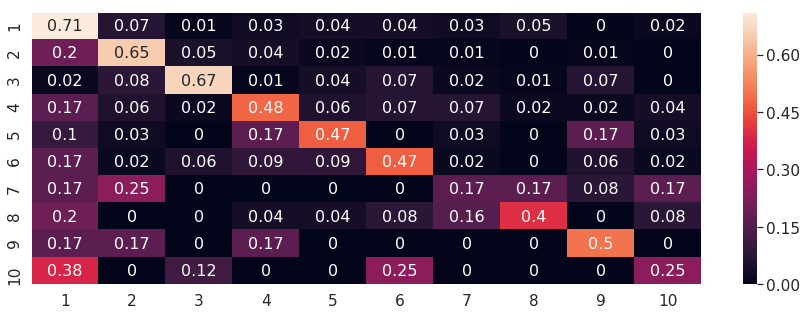


Random Forest Classifier normalized Confusion matrix (#2 in accuracy and #2 in logloss):


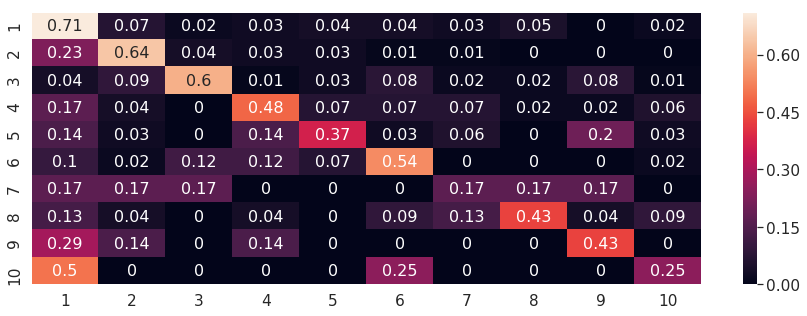


LDA logistic regression normalized Confusion matrix (best in logloss):


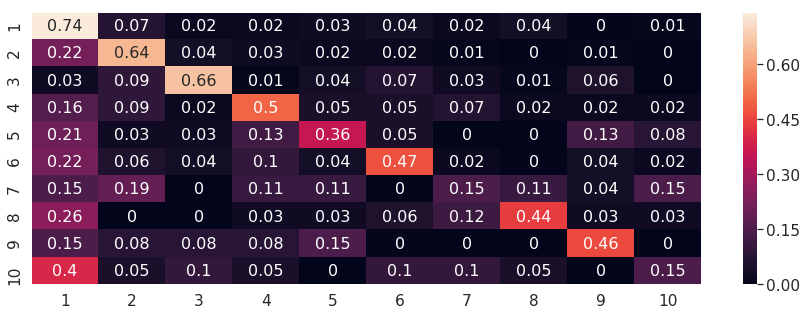

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header = None)
test_data = pd.read_csv("test_data.csv", header=None)

def super_multiclassifier(x_train, y_train, x_test, lda_components=10):
    #scale data
    sc = StandardScaler()
    scaled_train = sc.fit_transform(x_train)
    scaled_test = sc.fit_transform(x_test)

    #get lda components
    lda = LDA(n_components=lda_components)
    lda_train = lda.fit_transform(scaled_train, y_train.values.ravel())
    lda_test = lda.transform(scaled_test)

    #1logistic lda_regression
    logistic_lda_reg = sk.linear_model.LogisticRegression(solver='lbfgs', C=0.1, multi_class='auto')
    logistic_lda_reg.fit(lda_train, y_train.values.ravel())
    logistic_lda_predictions = pd.DataFrame(logistic_lda_reg.predict(lda_test), columns = ['Sample_label'])

    #2lda_random forest classifier
    classifier = RandomForestClassifier(max_depth=11, criterion='gini', max_features='auto', n_estimators=200, min_samples_leaf= 2, min_samples_split = 7)
    classifier.fit(lda_train, y_train.values.ravel())
    lda_random_forest_predictions = pd.DataFrame(classifier.predict(lda_test), columns = ['Sample_label'])

    #3LDA KNN
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=11, weights='distance', algorithm='auto', leaf_size=1)
    knn.fit(lda_train, y_train.values.ravel())
    lda_knn_predictions = pd.DataFrame(knn.predict(lda_test), columns = ['Sample_label'])
    
    #4LDA SupporVectorMachine
    SVM = sk.svm.SVC(kernel='linear', C=1, gamma=0.001)
    SVM.fit(lda_train, y_train.values.ravel())
    lda_svm_predictions = pd.DataFrame(SVM.predict(lda_test), columns = ['Sample_label'])

    ###COMBINE ALL PREDICTIONS
    all_preds = [lda_random_forest_predictions, logistic_lda_predictions, lda_knn_predictions, lda_svm_predictions]
    pred_df = pd.concat(all_preds, axis=1)
    #print(pred_df)
    ##Get Final predictions by taking most common value.
    final_predictions = pred_df.mode(axis=1)
    #If a draw, use random forest predictions (first columns)
    final = pd.DataFrame(final_predictions[0].astype(int))

    return final

def build_confusion_matrix(predictions, labels):
    c = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

    confusion_matrix = sk.metrics.confusion_matrix(predictions, labels)
    cm = np.round(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], 2)
    cm = pd.DataFrame(cm, columns=c)
    cm.index = cm.index + 1
    plt.figure(figsize=(15, 5))
    sn.set(font_scale=1.4)  # f# or label size
    sn.heatmap(cm, annot=True, annot_kws={"size": 16})  # font size
    plt.show()

    
##Test accuracy and logloss of multimodel and logistic regression.
print("Testing models.....\n\n")
iters = 5 ##change for number of iterations

scores = []
log_loss_results = []

for i in range(iters):
    #split data into training and validation
    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(train_data, train_labels, stratify=train_labels, test_size=0.25)
    final = super_multiclassifier(x_train, y_train, x_test)
    scores.append(sk.metrics.accuracy_score(final, y_test))
    
    sc = StandardScaler()
    scaled_train = sc.fit_transform(x_train)
    scaled_test = sc.fit_transform(x_test)
    
    lda = LDA(n_components=10)
    lda_train = lda.fit_transform(scaled_train, y_train.values.ravel())
    lda_test = lda.transform(scaled_test)

    logistic_lda_reg = sk.linear_model.LogisticRegression(solver='lbfgs', C=1, multi_class='auto')
    logistic_lda_reg.fit(lda_train, y_train.values.ravel())
    log_loss_results.append(sk.metrics.log_loss(y_test, logistic_lda_reg.predict_proba(lda_test)))
      
        ###ACCURACY###   #testing score = 0.6545 with 50 iterations and forest prio 
print('\033[1m' + "Accuracy with multimodel classificator:\n" + '\033[0m')
print("All multimodel results")
print(np.round(scores, 4))
print("Average accuracy:")
print(np.round(np.mean(scores), 4))
print("\n")

    ###LOGLOSS results###
print('\033[1m' + "Logloss results with LDA logistic regression:" + '\033[0m')
print("Average logloss after " + str(n) + " iterations: " + str(np.round(np.mean(log_loss_results), 4))  + "\n")

    ###Confusion matrix###
##multimodel confusion matrix(Best results in accuracy)
print('\033[1m' + "\nMultimodel normalized confusion matrix (best in accuracy)" + '\033[0m')
final_results = super_multiclassifier(x_train, y_train, x_test)
build_confusion_matrix(final_results, y_test)

sc = StandardScaler()
scaled_train = sc.fit_transform(x_train)
scaled_test = sc.fit_transform(x_test)
#get lda components
lda = LDA(n_components=10)
lda_train = lda.fit_transform(scaled_train, y_train.values.ravel())
lda_test = lda.transform(scaled_test)

##Random forest confusion matrix (second best in accuracy and second best in logloss)
print('\033[1m' + "\nRandom Forest Classifier normalized Confusion matrix " + '\033[0m' + "(#2 in accuracy and #2 in logloss):")
classifier = RandomForestClassifier(max_depth=11, criterion='gini', max_features='auto', n_estimators=200, min_samples_leaf= 2, min_samples_split = 7)
classifier.fit(lda_train, y_train.values.ravel())
random_forest_predictions = classifier.predict(lda_test)
build_confusion_matrix(random_forest_predictions, y_test)

##Logistic regression confusion matrix (second best in accuracy and best in logloss)
print('\033[1m' +"\nLDA logistic regression normalized Confusion matrix (best in logloss):" + '\033[0m')
logistic_lda_reg = sk.linear_model.LogisticRegression(solver='lbfgs', C=1, multi_class='auto')
logistic_lda_reg.fit(lda_train, y_train.values.ravel())
logistic_reg_predictions = logistic_lda_reg.predict(lda_test)
build_confusion_matrix(logistic_reg_predictions, y_test)

## 5. Discussion/Conclusions

### Results
The imbalance between classes in the dataset, large amount of features and multicollinearity of features make classification problem difficult. This can be seen from our results since the ~65% accuracy is far from reliable. Imbalance between classes is clearly making it harder to distinguish the less represented classes. This can be seen from the confusion matrix. Classification for the more represented classes work better, when the least represented classes achieve low accuracy scores. Also, the large amount of features makes to classification problem complicated, but as earlier discussed we can use LDA to combat this. Using ~10 LDA components improved the accuracy of all the models tested. This states that even more emphasis could be put on feature selection.

### Metrics & models
As stated by Brownlee (2015) one should not use accuracy as a performance metric when working with an imbalanced dataset. The measure is misleading. Instead, we should focus on metrics which are able to cope with the data limitations. For example, we can evaluate the performance of a model with a confusion matrix.

Ali & Siddiqui (2017) study in their paper ML based music genre classification. They try to find the best machine learning algorithm that predicts the genre of songs using k-nearest neighbors (KNN) and Support Vector Machine (SVM). They have similarly ten genre classes even though they are not exactly the same as in this project. From the results they found that without the PCA dimensionality reduction both k-nearest neighbors and Support Vector Machine (SVM) gave more accurate results compared to the results with dimensionality reduction. They were able to achieve an overall accuracy of 77% with SVM. However, one thing that clearly stands out from their research is that their results are not affected from the imbalanced multiclass dataset. They have an evenly balanced training data. This might be one reason for why we were not able achieve similar accuracy levels with our SVM model. 

Our study could be further improved by increasing the number of instances in the classes with a low number of representation. In general, the results could be tried to improve with the methods explained by Brownlee (2015) who discusses in his article about ways to combat imbalanced classes in a dataset. Another way to improve the performance would be to get rid of the multicollinearity in features. Different columns in the feature vector seem to be linearly correlated. This could enhance the LDA model performance. Our study could be extended further by Testing different deep learning neural networks on the dataset. Also, more time could be invested into feature selection. We believe results can be improved with better feature selection, obtaining a more balanced dataset, and finding methods that can remove multicollinearity from the dataset.

### Future improvements & discussion
The study tried to address the question what is the best machine learning method to identify what genre a song belongs to. We have explored multiple methods and techniques in order to answer the question. For this particular classification problem we have demonstrated feature selection with Linear Discriminant Analysis to be effective in finding good feature for multilabel supervised classification problems. We have also found multiple classification ML models that perform well in the task. With the given dataset we achieved the best accuracy and the lowest log loss with the LDA Random Forest Classifier. By expanding the hypotheses space it might be possible to find even better classifiers but given the time constraint and the imbalanced training dataset we were able to label the test data with an accuracy of 65.5% while the log loss being 17.9%. We think that the project was interesting and helpful in teaching us how to implement a ML method to a real-life application. Overall, the project challenged us to look for information outside the scope of the course and by doing this, we learned many ways how to improve our methods step by step and more about the field of machine learning in general. We gained new skills in developing, testing and implementing ML methods. 
*



## 6. References


[1] Agarwal, D. (2015). Comparing PCA and LDA techniques. [online] a tryst with programming. Available at: https://atrystwithprogramming.wordpress.com/2015/10/28/comparing-pca-and-lda-techniques/ [Accessed 1 Nov. 2018].

[2] Ali & Siddiqui (2017), Automatic Music Genres Classification using Machine Learning, (IJACSA) International Journal of Advanced Computer Science and Applications. Available at: http://thesai.org/Downloads/Volume8No8/Paper_44-Automatic_Music_Genres_Classification.pdf/ [Accessed 1 Nov. 2018]

[3] Bakharia, A. (2016). SVM Parameter Tuning in Scikit Learn using GridSearchCV. [online] Medium. Available at: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0 [Accessed 2 Nov. 2018].

[4] Ben Fraj, M. (2017). In Depth: Parameter tuning for KNN – Mohtadi Ben Fraj – Medium. [online] Medium. Available at: https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6 [Accessed 2 Nov. 2018].

[5] Brownlee, J. (2015). 8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ [Accessed 31 Oct. 2018].

[6] Brownlee, J. (2016). Linear Discriminant Analysis for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/ [Accessed 1 Nov. 2018].

[7] ng, R. (2017). Optimal Tuning Parameters. [online] ritchieng.github.io. Available at: https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/ [Accessed 2 Nov. 2018].

[8] Raschka, S. (2014). Linear Discriminant Analysis. [online] Dr. Sebastian Raschka. Available at: https://sebastianraschka.com/Articles/2014_python_lda.html [Accessed 2 Nov. 2018].

[9] Ray, S. (2017). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ [Accessed 2 Nov. 2018].

[10] Shinohara, M. (2017). Hyper Parameters Tuning of DTree,RF,SVM,kNN | Kaggle. [online] Kaggle.com. Available at: https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn [Accessed 2 Nov. 2018].

[11] Srivastava, T. (2015). Tuning Random Forest model | Machine Learning | Predictive modeling. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ [Accessed 2 Nov. 2018].


[12] Malik, U. (2018). Implementing LDA in Python with Scikit-Learn. [online] Stack Abuse. Available at: https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/ [Accessed 2 Nov. 2018].

[13] Patel, S. (2017). Chapter 5: Random Forest Classifier – Machine Learning 101 – Medium. [online] Medium. Available at: https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1 [Accessed 2 Nov. 2018].